In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
dataset_dir = 'E:\Computer Vision\Traffic_Sign_Recognition'
#Retrieving the images and their labels 
metaDf = pd.read_csv('E:\Computer Vision\Traffic_Sign_Recognition\Meta.csv') 

trainDf = pd.read_csv('E:\Computer Vision\Traffic_Sign_Recognition\Train.csv') 

testDf= pd.read_csv('E:\Computer Vision\Traffic_Sign_Recognition\Test.csv') 

labels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for tracks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for track', 'Brock',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for track']
print('SHAPE of training set:',trainDf.shape)
print('SHAPE of test set:',trainDf.shape)
print('SHAPE of MetaInfo:',trainDf.shape)

SHAPE of training set: (39209, 8)
SHAPE of test set: (39209, 8)
SHAPE of MetaInfo: (39209, 8)


In [3]:
trainDf['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), trainDf['Path']))
testDf['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), testDf['Path']))
metaDf['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), metaDf['Path']))

In [4]:
testDf.sample(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
3195,57,51,6,5,52,46,11,E:\Computer Vision\Traffic_Sign_Recognition\te...
11472,33,33,5,5,28,28,1,E:\Computer Vision\Traffic_Sign_Recognition\te...
646,41,43,5,5,36,38,12,E:\Computer Vision\Traffic_Sign_Recognition\te...
9386,70,69,7,6,64,63,34,E:\Computer Vision\Traffic_Sign_Recognition\te...
9067,41,42,5,6,35,37,38,E:\Computer Vision\Traffic_Sign_Recognition\te...
9365,52,52,5,6,47,47,1,E:\Computer Vision\Traffic_Sign_Recognition\te...
5753,37,36,6,5,32,31,5,E:\Computer Vision\Traffic_Sign_Recognition\te...
6020,27,28,5,6,22,23,2,E:\Computer Vision\Traffic_Sign_Recognition\te...
12461,33,35,5,6,28,30,12,E:\Computer Vision\Traffic_Sign_Recognition\te...
5213,50,52,6,6,45,46,14,E:\Computer Vision\Traffic_Sign_Recognition\te...


In [5]:
trainDf.sample(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
7750,35,34,6,5,30,29,4,E:\Computer Vision\Traffic_Sign_Recognition\tr...
22076,115,105,10,10,105,96,13,E:\Computer Vision\Traffic_Sign_Recognition\tr...
23845,49,54,5,6,43,49,15,E:\Computer Vision\Traffic_Sign_Recognition\tr...
32490,38,35,6,5,33,30,31,E:\Computer Vision\Traffic_Sign_Recognition\tr...
12607,34,32,5,6,29,27,8,E:\Computer Vision\Traffic_Sign_Recognition\tr...
5483,39,40,5,6,34,35,3,E:\Computer Vision\Traffic_Sign_Recognition\tr...
27564,72,69,7,7,65,63,22,E:\Computer Vision\Traffic_Sign_Recognition\tr...
36380,36,35,6,5,31,30,38,E:\Computer Vision\Traffic_Sign_Recognition\tr...
29628,51,46,6,6,45,41,25,E:\Computer Vision\Traffic_Sign_Recognition\tr...
25052,29,28,6,6,24,23,17,E:\Computer Vision\Traffic_Sign_Recognition\tr...


In [6]:
metaDf.sample(10)

,Path,ClassId,ShapeId,ColorId,SignId
36,E:\Computer Vision\Traffic_Sign_Recognition\me...,41,1,3,3.26
37,E:\Computer Vision\Traffic_Sign_Recognition\me...,42,1,3,3.28
24,E:\Computer Vision\Traffic_Sign_Recognition\me...,30,0,0,None
8,E:\Computer Vision\Traffic_Sign_Recognition\me...,15,1,0,3.1
30,E:\Computer Vision\Traffic_Sign_Recognition\me...,36,1,1,4.4
13,E:\Computer Vision\Traffic_Sign_Recognition\me...,2,1,0,3.29
33,E:\Computer Vision\Traffic_Sign_Recognition\me...,39,1,1,4.8
19,E:\Computer Vision\Traffic_Sign_Recognition\me...,25,0,0,1.37
12,E:\Computer Vision\Traffic_Sign_Recognition\me...,19,0,0,1.2
14,E:\Computer Vision\Traffic_Sign_Recognition\me...,20,0,0,1.1


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


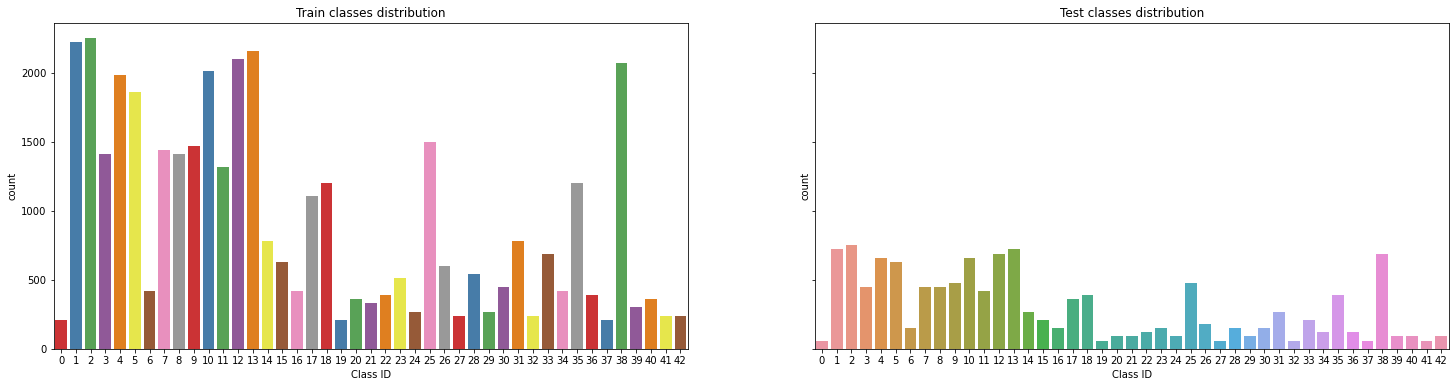

In [7]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(25, 6))
axs[0].set_title('Train classes distribution')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[1].set_title('Test classes distribution')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')
sns.countplot(trainDf.ClassId, ax=axs[0],palette = "Set1")
sns.countplot(testDf.ClassId, ax=axs[1])
axs[0].set_xlabel('Class ID');
axs[1].set_xlabel('Class ID');


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please up

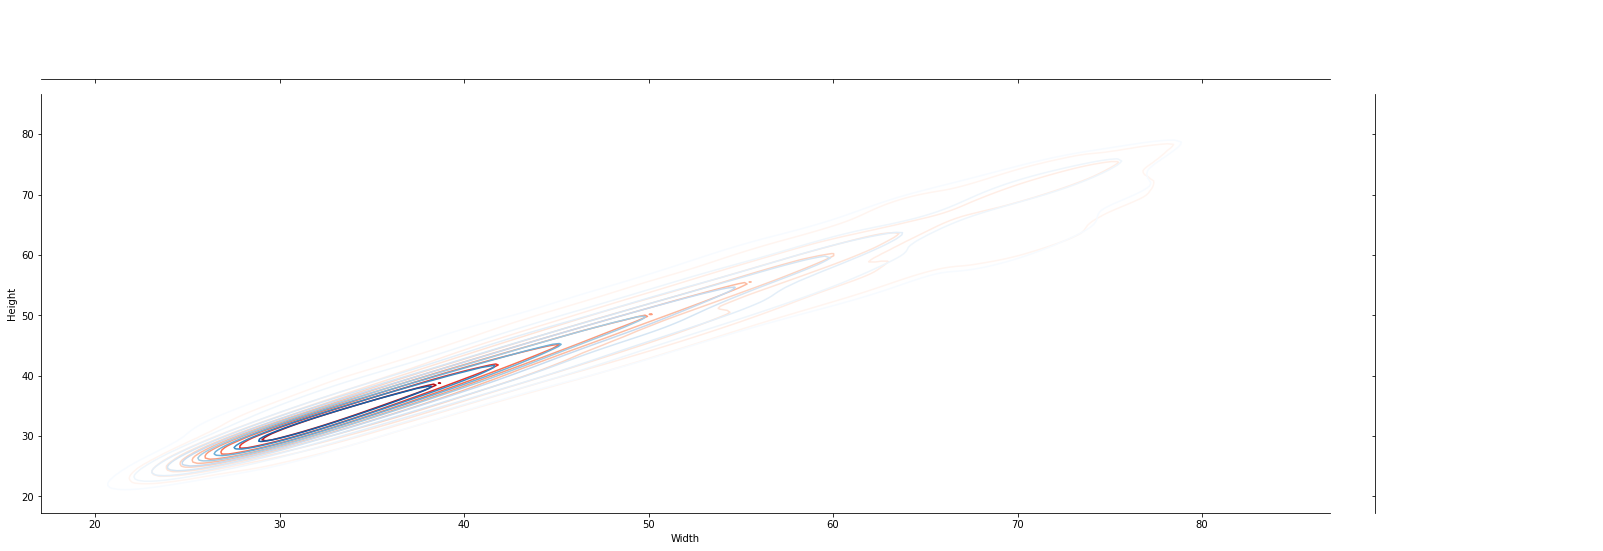

In [8]:
trainDfDpiSubset = trainDf[(trainDf.Width < 80) & (trainDf.Height < 80)];
testDfDpiSubset = testDf[(testDf.Width < 80) & (testDf.Height < 80)];
g = sns.JointGrid(x="Width", y="Height", data=trainDfDpiSubset)
sns.kdeplot(trainDfDpiSubset.Width, trainDfDpiSubset.Height, cmap="Reds",shade=False, shade_lowest=False, ax=g.ax_joint)
sns.kdeplot(testDfDpiSubset.Width, testDfDpiSubset.Height, cmap="Blues", shade=False, shade_lowest=False, ax=g.ax_joint)
g.fig.set_figwidth(25)
g.fig.set_figheight(8)
plt.show();


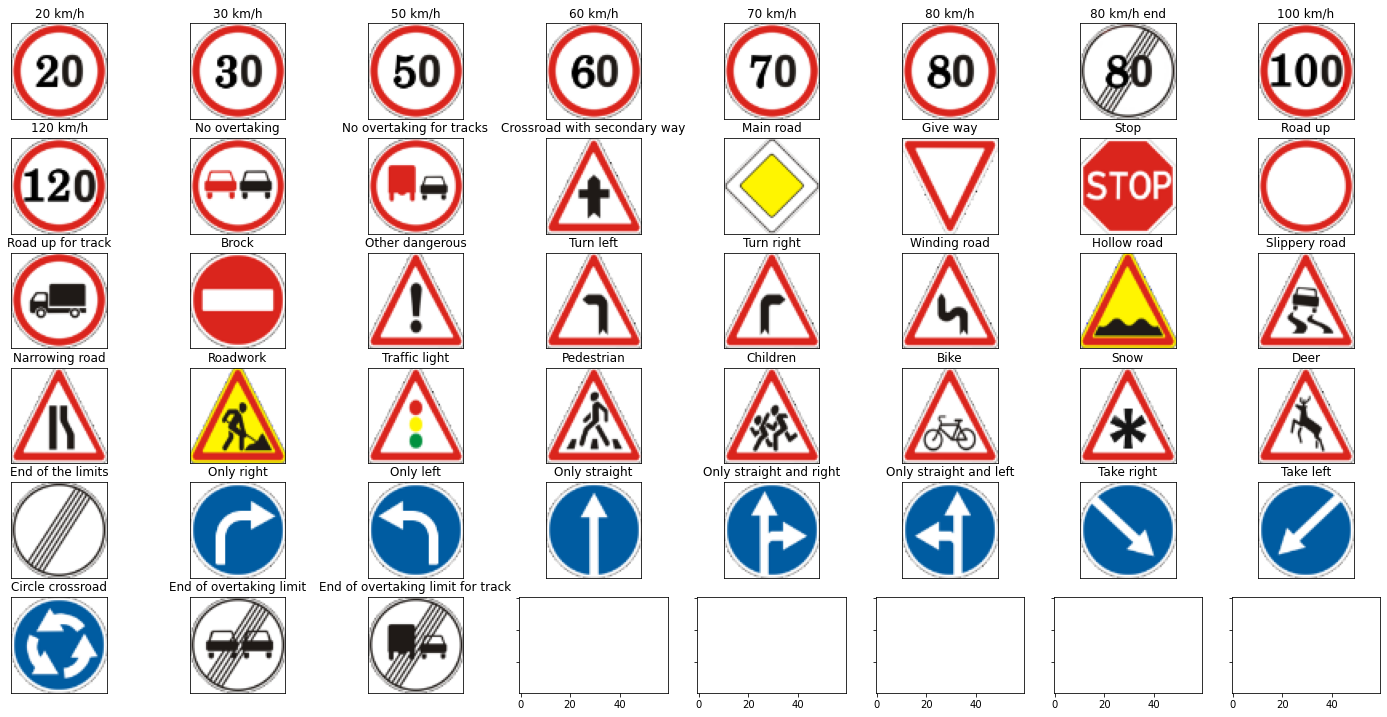

In [9]:
sns.set_style()
rows = 6
cols = 8
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None)
metaDf = metaDf.sort_values(by=['ClassId'])
idx = 0
for i in range(rows):
    for j in range(cols):
        if idx > 42:
            break
            
        img = cv2.imread(metaDf["Path"].tolist()[idx], cv2.IMREAD_UNCHANGED)
        img[np.where(img[:,:,3]==0)] = [255,255,255,255]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (60,60))
        
        axs[i,j].imshow(img)
        axs[i,j].set_facecolor('xkcd:salmon')
        axs[i,j].set_facecolor((1.0, 0.47, 0.42))
        axs[i,j].set_title(labels[int(metaDf["ClassId"].tolist()[idx])])
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        idx += 1

C:\Users\Aniket Sehgal\Projects\Untitled Folder


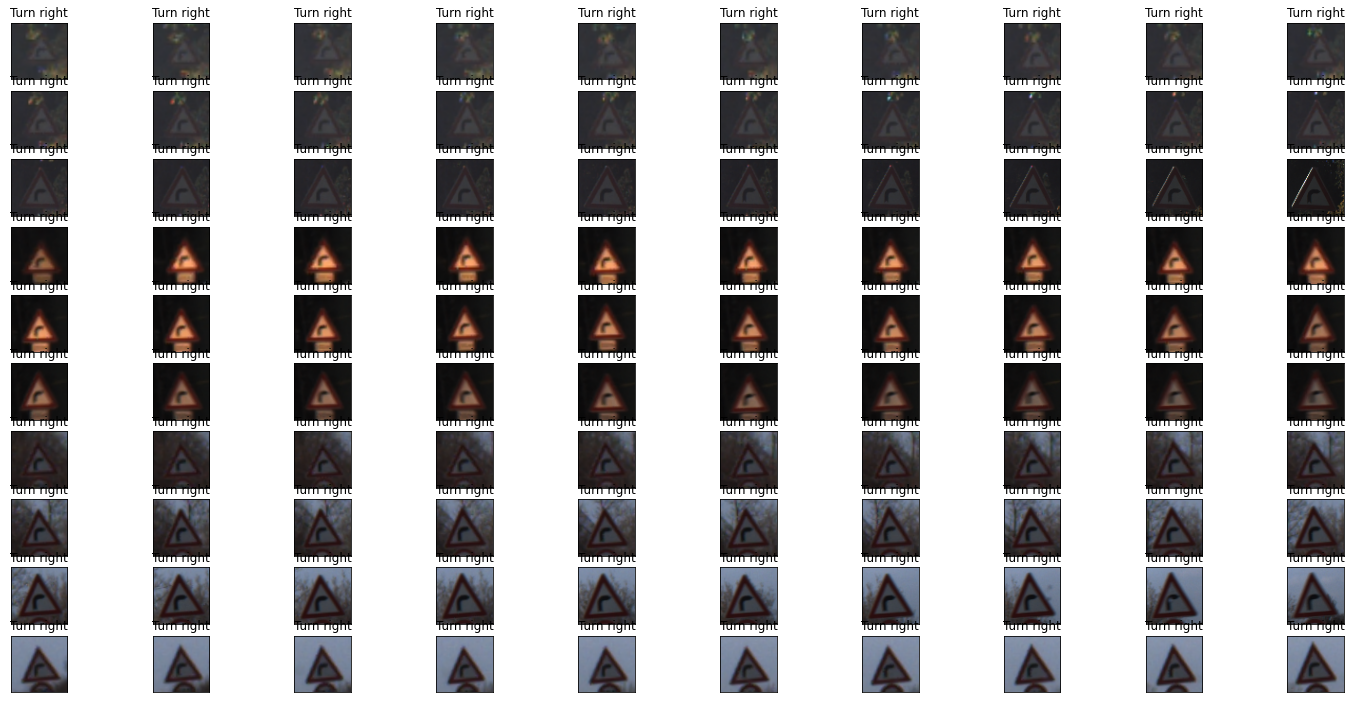

In [10]:
rows = 10
cols = 10
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None)
cur_path = 'C:\\Users\\Aniket Sehgal\\Projects\\Untitled Folder'
print(cur_path)
idx = 0
for i in range(rows):
    for j in range(cols):
        path = os.path.join(cur_path,trainDf["Path"].tolist()[idx]) 
        img = cv2.imread(path,cv2.IMREAD_UNCHANGED)
        #print(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (60,60))
        axs[i,j].imshow(img)
        axs[i,j].set_title(labels[int(trainDf["ClassId"].tolist()[idx])])
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        idx += 1


In [11]:
os.getcwd()

'C:\\Users\\Aniket Sehgal\\Projects\\Untitled Folder'

In [12]:
os.listdir()

['.ipynb_checkpoints',
 'Traffic_Sign_Classification.ipynb',
 'Train sign prediciton 1.ipynb']

In [13]:
x=os.path.join('E:\\Computer Vision\\', 'Traffic_sign_Recognition\\Train', str(0))
x


'E:\\Computer Vision\\Traffic_sign_Recognition\\Train\\0'

In [14]:
os.listdir(x)

['00000_00000_00000.png',
 '00000_00000_00001.png',
 '00000_00000_00002.png',
 '00000_00000_00003.png',
 '00000_00000_00004.png',
 '00000_00000_00005.png',
 '00000_00000_00006.png',
 '00000_00000_00007.png',
 '00000_00000_00008.png',
 '00000_00000_00009.png',
 '00000_00000_00010.png',
 '00000_00000_00011.png',
 '00000_00000_00012.png',
 '00000_00000_00013.png',
 '00000_00000_00014.png',
 '00000_00000_00015.png',
 '00000_00000_00016.png',
 '00000_00000_00017.png',
 '00000_00000_00018.png',
 '00000_00000_00019.png',
 '00000_00000_00020.png',
 '00000_00000_00021.png',
 '00000_00000_00022.png',
 '00000_00000_00023.png',
 '00000_00000_00024.png',
 '00000_00000_00025.png',
 '00000_00000_00026.png',
 '00000_00000_00027.png',
 '00000_00000_00028.png',
 '00000_00000_00029.png',
 '00000_00001_00000.png',
 '00000_00001_00001.png',
 '00000_00001_00002.png',
 '00000_00001_00003.png',
 '00000_00001_00004.png',
 '00000_00001_00005.png',
 '00000_00001_00006.png',
 '00000_00001_00007.png',
 '00000_0000

In [15]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
print(cur_path)


#Retrieving the images and their labels 

for i in range(classes):
    path = os.path.join('E:\\Computer Vision\\', 'Traffic_sign_Recognition\\Train', str(i))
    images = os.listdir(path)
    print(path)
    print(images)
    #Converting lists into numpy arrays
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


C:\Users\Aniket Sehgal\Projects\Untitled Folder
E:\Computer Vision\Traffic_sign_Recognition\Train\0
['00000_00000_00000.png', '00000_00000_00001.png', '00000_00000_00002.png', '00000_00000_00003.png', '00000_00000_00004.png', '00000_00000_00005.png', '00000_00000_00006.png', '00000_00000_00007.png', '00000_00000_00008.png', '00000_00000_00009.png', '00000_00000_00010.png', '00000_00000_00011.png', '00000_00000_00012.png', '00000_00000_00013.png', '00000_00000_00014.png', '00000_00000_00015.png', '00000_00000_00016.png', '00000_00000_00017.png', '00000_00000_00018.png', '00000_00000_00019.png', '00000_00000_00020.png', '00000_00000_00021.png', '00000_00000_00022.png', '00000_00000_00023.png', '00000_00000_00024.png', '00000_00000_00025.png', '00000_00000_00026.png', '00000_00000_00027.png', '00000_00000_00028.png', '00000_00000_00029.png', '00000_00001_00000.png', '00000_00001_00001.png', '00000_00001_00002.png', '00000_00001_00003.png', '00000_00001_00004.png', '00000_00001_00005.png',

E:\Computer Vision\Traffic_sign_Recognition\Train\2
['00002_00000_00000.png', '00002_00000_00001.png', '00002_00000_00002.png', '00002_00000_00003.png', '00002_00000_00004.png', '00002_00000_00005.png', '00002_00000_00006.png', '00002_00000_00007.png', '00002_00000_00008.png', '00002_00000_00009.png', '00002_00000_00010.png', '00002_00000_00011.png', '00002_00000_00012.png', '00002_00000_00013.png', '00002_00000_00014.png', '00002_00000_00015.png', '00002_00000_00016.png', '00002_00000_00017.png', '00002_00000_00018.png', '00002_00000_00019.png', '00002_00000_00020.png', '00002_00000_00021.png', '00002_00000_00022.png', '00002_00000_00023.png', '00002_00000_00024.png', '00002_00000_00025.png', '00002_00000_00026.png', '00002_00000_00027.png', '00002_00000_00028.png', '00002_00000_00029.png', '00002_00001_00000.png', '00002_00001_00001.png', '00002_00001_00002.png', '00002_00001_00003.png', '00002_00001_00004.png', '00002_00001_00005.png', '00002_00001_00006.png', '00002_00001_00007.png

E:\Computer Vision\Traffic_sign_Recognition\Train\3
['00003_00000_00000.png', '00003_00000_00001.png', '00003_00000_00002.png', '00003_00000_00003.png', '00003_00000_00004.png', '00003_00000_00005.png', '00003_00000_00006.png', '00003_00000_00007.png', '00003_00000_00008.png', '00003_00000_00009.png', '00003_00000_00010.png', '00003_00000_00011.png', '00003_00000_00012.png', '00003_00000_00013.png', '00003_00000_00014.png', '00003_00000_00015.png', '00003_00000_00016.png', '00003_00000_00017.png', '00003_00000_00018.png', '00003_00000_00019.png', '00003_00000_00020.png', '00003_00000_00021.png', '00003_00000_00022.png', '00003_00000_00023.png', '00003_00000_00024.png', '00003_00000_00025.png', '00003_00000_00026.png', '00003_00000_00027.png', '00003_00000_00028.png', '00003_00000_00029.png', '00003_00001_00000.png', '00003_00001_00001.png', '00003_00001_00002.png', '00003_00001_00003.png', '00003_00001_00004.png', '00003_00001_00005.png', '00003_00001_00006.png', '00003_00001_00007.png

E:\Computer Vision\Traffic_sign_Recognition\Train\4
['00004_00000_00000.png', '00004_00000_00001.png', '00004_00000_00002.png', '00004_00000_00003.png', '00004_00000_00004.png', '00004_00000_00005.png', '00004_00000_00006.png', '00004_00000_00007.png', '00004_00000_00008.png', '00004_00000_00009.png', '00004_00000_00010.png', '00004_00000_00011.png', '00004_00000_00012.png', '00004_00000_00013.png', '00004_00000_00014.png', '00004_00000_00015.png', '00004_00000_00016.png', '00004_00000_00017.png', '00004_00000_00018.png', '00004_00000_00019.png', '00004_00000_00020.png', '00004_00000_00021.png', '00004_00000_00022.png', '00004_00000_00023.png', '00004_00000_00024.png', '00004_00000_00025.png', '00004_00000_00026.png', '00004_00000_00027.png', '00004_00000_00028.png', '00004_00000_00029.png', '00004_00001_00000.png', '00004_00001_00001.png', '00004_00001_00002.png', '00004_00001_00003.png', '00004_00001_00004.png', '00004_00001_00005.png', '00004_00001_00006.png', '00004_00001_00007.png

E:\Computer Vision\Traffic_sign_Recognition\Train\5
['00005_00000_00000.png', '00005_00000_00001.png', '00005_00000_00002.png', '00005_00000_00003.png', '00005_00000_00004.png', '00005_00000_00005.png', '00005_00000_00006.png', '00005_00000_00007.png', '00005_00000_00008.png', '00005_00000_00009.png', '00005_00000_00010.png', '00005_00000_00011.png', '00005_00000_00012.png', '00005_00000_00013.png', '00005_00000_00014.png', '00005_00000_00015.png', '00005_00000_00016.png', '00005_00000_00017.png', '00005_00000_00018.png', '00005_00000_00019.png', '00005_00000_00020.png', '00005_00000_00021.png', '00005_00000_00022.png', '00005_00000_00023.png', '00005_00000_00024.png', '00005_00000_00025.png', '00005_00000_00026.png', '00005_00000_00027.png', '00005_00000_00028.png', '00005_00000_00029.png', '00005_00001_00000.png', '00005_00001_00001.png', '00005_00001_00002.png', '00005_00001_00003.png', '00005_00001_00004.png', '00005_00001_00005.png', '00005_00001_00006.png', '00005_00001_00007.png

E:\Computer Vision\Traffic_sign_Recognition\Train\6
['00006_00000_00000.png', '00006_00000_00001.png', '00006_00000_00002.png', '00006_00000_00003.png', '00006_00000_00004.png', '00006_00000_00005.png', '00006_00000_00006.png', '00006_00000_00007.png', '00006_00000_00008.png', '00006_00000_00009.png', '00006_00000_00010.png', '00006_00000_00011.png', '00006_00000_00012.png', '00006_00000_00013.png', '00006_00000_00014.png', '00006_00000_00015.png', '00006_00000_00016.png', '00006_00000_00017.png', '00006_00000_00018.png', '00006_00000_00019.png', '00006_00000_00020.png', '00006_00000_00021.png', '00006_00000_00022.png', '00006_00000_00023.png', '00006_00000_00024.png', '00006_00000_00025.png', '00006_00000_00026.png', '00006_00000_00027.png', '00006_00000_00028.png', '00006_00000_00029.png', '00006_00001_00000.png', '00006_00001_00001.png', '00006_00001_00002.png', '00006_00001_00003.png', '00006_00001_00004.png', '00006_00001_00005.png', '00006_00001_00006.png', '00006_00001_00007.png

E:\Computer Vision\Traffic_sign_Recognition\Train\7
['00007_00000_00000.png', '00007_00000_00001.png', '00007_00000_00002.png', '00007_00000_00003.png', '00007_00000_00004.png', '00007_00000_00005.png', '00007_00000_00006.png', '00007_00000_00007.png', '00007_00000_00008.png', '00007_00000_00009.png', '00007_00000_00010.png', '00007_00000_00011.png', '00007_00000_00012.png', '00007_00000_00013.png', '00007_00000_00014.png', '00007_00000_00015.png', '00007_00000_00016.png', '00007_00000_00017.png', '00007_00000_00018.png', '00007_00000_00019.png', '00007_00000_00020.png', '00007_00000_00021.png', '00007_00000_00022.png', '00007_00000_00023.png', '00007_00000_00024.png', '00007_00000_00025.png', '00007_00000_00026.png', '00007_00000_00027.png', '00007_00000_00028.png', '00007_00000_00029.png', '00007_00001_00000.png', '00007_00001_00001.png', '00007_00001_00002.png', '00007_00001_00003.png', '00007_00001_00004.png', '00007_00001_00005.png', '00007_00001_00006.png', '00007_00001_00007.png

E:\Computer Vision\Traffic_sign_Recognition\Train\8
['00008_00000_00000.png', '00008_00000_00001.png', '00008_00000_00002.png', '00008_00000_00003.png', '00008_00000_00004.png', '00008_00000_00005.png', '00008_00000_00006.png', '00008_00000_00007.png', '00008_00000_00008.png', '00008_00000_00009.png', '00008_00000_00010.png', '00008_00000_00011.png', '00008_00000_00012.png', '00008_00000_00013.png', '00008_00000_00014.png', '00008_00000_00015.png', '00008_00000_00016.png', '00008_00000_00017.png', '00008_00000_00018.png', '00008_00000_00019.png', '00008_00000_00020.png', '00008_00000_00021.png', '00008_00000_00022.png', '00008_00000_00023.png', '00008_00000_00024.png', '00008_00000_00025.png', '00008_00000_00026.png', '00008_00000_00027.png', '00008_00000_00028.png', '00008_00000_00029.png', '00008_00001_00000.png', '00008_00001_00001.png', '00008_00001_00002.png', '00008_00001_00003.png', '00008_00001_00004.png', '00008_00001_00005.png', '00008_00001_00006.png', '00008_00001_00007.png

E:\Computer Vision\Traffic_sign_Recognition\Train\9
['00009_00000_00000.png', '00009_00000_00001.png', '00009_00000_00002.png', '00009_00000_00003.png', '00009_00000_00004.png', '00009_00000_00005.png', '00009_00000_00006.png', '00009_00000_00007.png', '00009_00000_00008.png', '00009_00000_00009.png', '00009_00000_00010.png', '00009_00000_00011.png', '00009_00000_00012.png', '00009_00000_00013.png', '00009_00000_00014.png', '00009_00000_00015.png', '00009_00000_00016.png', '00009_00000_00017.png', '00009_00000_00018.png', '00009_00000_00019.png', '00009_00000_00020.png', '00009_00000_00021.png', '00009_00000_00022.png', '00009_00000_00023.png', '00009_00000_00024.png', '00009_00000_00025.png', '00009_00000_00026.png', '00009_00000_00027.png', '00009_00000_00028.png', '00009_00000_00029.png', '00009_00001_00000.png', '00009_00001_00001.png', '00009_00001_00002.png', '00009_00001_00003.png', '00009_00001_00004.png', '00009_00001_00005.png', '00009_00001_00006.png', '00009_00001_00007.png

E:\Computer Vision\Traffic_sign_Recognition\Train\10
['00010_00000_00000.png', '00010_00000_00001.png', '00010_00000_00002.png', '00010_00000_00003.png', '00010_00000_00004.png', '00010_00000_00005.png', '00010_00000_00006.png', '00010_00000_00007.png', '00010_00000_00008.png', '00010_00000_00009.png', '00010_00000_00010.png', '00010_00000_00011.png', '00010_00000_00012.png', '00010_00000_00013.png', '00010_00000_00014.png', '00010_00000_00015.png', '00010_00000_00016.png', '00010_00000_00017.png', '00010_00000_00018.png', '00010_00000_00019.png', '00010_00000_00020.png', '00010_00000_00021.png', '00010_00000_00022.png', '00010_00000_00023.png', '00010_00000_00024.png', '00010_00000_00025.png', '00010_00000_00026.png', '00010_00000_00027.png', '00010_00000_00028.png', '00010_00000_00029.png', '00010_00001_00000.png', '00010_00001_00001.png', '00010_00001_00002.png', '00010_00001_00003.png', '00010_00001_00004.png', '00010_00001_00005.png', '00010_00001_00006.png', '00010_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\11
['00011_00000_00000.png', '00011_00000_00001.png', '00011_00000_00002.png', '00011_00000_00003.png', '00011_00000_00004.png', '00011_00000_00005.png', '00011_00000_00006.png', '00011_00000_00007.png', '00011_00000_00008.png', '00011_00000_00009.png', '00011_00000_00010.png', '00011_00000_00011.png', '00011_00000_00012.png', '00011_00000_00013.png', '00011_00000_00014.png', '00011_00000_00015.png', '00011_00000_00016.png', '00011_00000_00017.png', '00011_00000_00018.png', '00011_00000_00019.png', '00011_00000_00020.png', '00011_00000_00021.png', '00011_00000_00022.png', '00011_00000_00023.png', '00011_00000_00024.png', '00011_00000_00025.png', '00011_00000_00026.png', '00011_00000_00027.png', '00011_00000_00028.png', '00011_00000_00029.png', '00011_00001_00000.png', '00011_00001_00001.png', '00011_00001_00002.png', '00011_00001_00003.png', '00011_00001_00004.png', '00011_00001_00005.png', '00011_00001_00006.png', '00011_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\12
['00012_00000_00000.png', '00012_00000_00001.png', '00012_00000_00002.png', '00012_00000_00003.png', '00012_00000_00004.png', '00012_00000_00005.png', '00012_00000_00006.png', '00012_00000_00007.png', '00012_00000_00008.png', '00012_00000_00009.png', '00012_00000_00010.png', '00012_00000_00011.png', '00012_00000_00012.png', '00012_00000_00013.png', '00012_00000_00014.png', '00012_00000_00015.png', '00012_00000_00016.png', '00012_00000_00017.png', '00012_00000_00018.png', '00012_00000_00019.png', '00012_00000_00020.png', '00012_00000_00021.png', '00012_00000_00022.png', '00012_00000_00023.png', '00012_00000_00024.png', '00012_00000_00025.png', '00012_00000_00026.png', '00012_00000_00027.png', '00012_00000_00028.png', '00012_00000_00029.png', '00012_00001_00000.png', '00012_00001_00001.png', '00012_00001_00002.png', '00012_00001_00003.png', '00012_00001_00004.png', '00012_00001_00005.png', '00012_00001_00006.png', '00012_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\13
['00013_00000_00000.png', '00013_00000_00001.png', '00013_00000_00002.png', '00013_00000_00003.png', '00013_00000_00004.png', '00013_00000_00005.png', '00013_00000_00006.png', '00013_00000_00007.png', '00013_00000_00008.png', '00013_00000_00009.png', '00013_00000_00010.png', '00013_00000_00011.png', '00013_00000_00012.png', '00013_00000_00013.png', '00013_00000_00014.png', '00013_00000_00015.png', '00013_00000_00016.png', '00013_00000_00017.png', '00013_00000_00018.png', '00013_00000_00019.png', '00013_00000_00020.png', '00013_00000_00021.png', '00013_00000_00022.png', '00013_00000_00023.png', '00013_00000_00024.png', '00013_00000_00025.png', '00013_00000_00026.png', '00013_00000_00027.png', '00013_00000_00028.png', '00013_00000_00029.png', '00013_00001_00000.png', '00013_00001_00001.png', '00013_00001_00002.png', '00013_00001_00003.png', '00013_00001_00004.png', '00013_00001_00005.png', '00013_00001_00006.png', '00013_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\14
['00014_00000_00000.png', '00014_00000_00001.png', '00014_00000_00002.png', '00014_00000_00003.png', '00014_00000_00004.png', '00014_00000_00005.png', '00014_00000_00006.png', '00014_00000_00007.png', '00014_00000_00008.png', '00014_00000_00009.png', '00014_00000_00010.png', '00014_00000_00011.png', '00014_00000_00012.png', '00014_00000_00013.png', '00014_00000_00014.png', '00014_00000_00015.png', '00014_00000_00016.png', '00014_00000_00017.png', '00014_00000_00018.png', '00014_00000_00019.png', '00014_00000_00020.png', '00014_00000_00021.png', '00014_00000_00022.png', '00014_00000_00023.png', '00014_00000_00024.png', '00014_00000_00025.png', '00014_00000_00026.png', '00014_00000_00027.png', '00014_00000_00028.png', '00014_00000_00029.png', '00014_00001_00000.png', '00014_00001_00001.png', '00014_00001_00002.png', '00014_00001_00003.png', '00014_00001_00004.png', '00014_00001_00005.png', '00014_00001_00006.png', '00014_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\15
['00015_00000_00000.png', '00015_00000_00001.png', '00015_00000_00002.png', '00015_00000_00003.png', '00015_00000_00004.png', '00015_00000_00005.png', '00015_00000_00006.png', '00015_00000_00007.png', '00015_00000_00008.png', '00015_00000_00009.png', '00015_00000_00010.png', '00015_00000_00011.png', '00015_00000_00012.png', '00015_00000_00013.png', '00015_00000_00014.png', '00015_00000_00015.png', '00015_00000_00016.png', '00015_00000_00017.png', '00015_00000_00018.png', '00015_00000_00019.png', '00015_00000_00020.png', '00015_00000_00021.png', '00015_00000_00022.png', '00015_00000_00023.png', '00015_00000_00024.png', '00015_00000_00025.png', '00015_00000_00026.png', '00015_00000_00027.png', '00015_00000_00028.png', '00015_00000_00029.png', '00015_00001_00000.png', '00015_00001_00001.png', '00015_00001_00002.png', '00015_00001_00003.png', '00015_00001_00004.png', '00015_00001_00005.png', '00015_00001_00006.png', '00015_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\16
['00016_00000_00000.png', '00016_00000_00001.png', '00016_00000_00002.png', '00016_00000_00003.png', '00016_00000_00004.png', '00016_00000_00005.png', '00016_00000_00006.png', '00016_00000_00007.png', '00016_00000_00008.png', '00016_00000_00009.png', '00016_00000_00010.png', '00016_00000_00011.png', '00016_00000_00012.png', '00016_00000_00013.png', '00016_00000_00014.png', '00016_00000_00015.png', '00016_00000_00016.png', '00016_00000_00017.png', '00016_00000_00018.png', '00016_00000_00019.png', '00016_00000_00020.png', '00016_00000_00021.png', '00016_00000_00022.png', '00016_00000_00023.png', '00016_00000_00024.png', '00016_00000_00025.png', '00016_00000_00026.png', '00016_00000_00027.png', '00016_00000_00028.png', '00016_00000_00029.png', '00016_00001_00000.png', '00016_00001_00001.png', '00016_00001_00002.png', '00016_00001_00003.png', '00016_00001_00004.png', '00016_00001_00005.png', '00016_00001_00006.png', '00016_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\17
['00017_00000_00000.png', '00017_00000_00001.png', '00017_00000_00002.png', '00017_00000_00003.png', '00017_00000_00004.png', '00017_00000_00005.png', '00017_00000_00006.png', '00017_00000_00007.png', '00017_00000_00008.png', '00017_00000_00009.png', '00017_00000_00010.png', '00017_00000_00011.png', '00017_00000_00012.png', '00017_00000_00013.png', '00017_00000_00014.png', '00017_00000_00015.png', '00017_00000_00016.png', '00017_00000_00017.png', '00017_00000_00018.png', '00017_00000_00019.png', '00017_00000_00020.png', '00017_00000_00021.png', '00017_00000_00022.png', '00017_00000_00023.png', '00017_00000_00024.png', '00017_00000_00025.png', '00017_00000_00026.png', '00017_00000_00027.png', '00017_00000_00028.png', '00017_00000_00029.png', '00017_00001_00000.png', '00017_00001_00001.png', '00017_00001_00002.png', '00017_00001_00003.png', '00017_00001_00004.png', '00017_00001_00005.png', '00017_00001_00006.png', '00017_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\18
['00018_00000_00000.png', '00018_00000_00001.png', '00018_00000_00002.png', '00018_00000_00003.png', '00018_00000_00004.png', '00018_00000_00005.png', '00018_00000_00006.png', '00018_00000_00007.png', '00018_00000_00008.png', '00018_00000_00009.png', '00018_00000_00010.png', '00018_00000_00011.png', '00018_00000_00012.png', '00018_00000_00013.png', '00018_00000_00014.png', '00018_00000_00015.png', '00018_00000_00016.png', '00018_00000_00017.png', '00018_00000_00018.png', '00018_00000_00019.png', '00018_00000_00020.png', '00018_00000_00021.png', '00018_00000_00022.png', '00018_00000_00023.png', '00018_00000_00024.png', '00018_00000_00025.png', '00018_00000_00026.png', '00018_00000_00027.png', '00018_00000_00028.png', '00018_00000_00029.png', '00018_00001_00000.png', '00018_00001_00001.png', '00018_00001_00002.png', '00018_00001_00003.png', '00018_00001_00004.png', '00018_00001_00005.png', '00018_00001_00006.png', '00018_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\19
['00019_00000_00000.png', '00019_00000_00001.png', '00019_00000_00002.png', '00019_00000_00003.png', '00019_00000_00004.png', '00019_00000_00005.png', '00019_00000_00006.png', '00019_00000_00007.png', '00019_00000_00008.png', '00019_00000_00009.png', '00019_00000_00010.png', '00019_00000_00011.png', '00019_00000_00012.png', '00019_00000_00013.png', '00019_00000_00014.png', '00019_00000_00015.png', '00019_00000_00016.png', '00019_00000_00017.png', '00019_00000_00018.png', '00019_00000_00019.png', '00019_00000_00020.png', '00019_00000_00021.png', '00019_00000_00022.png', '00019_00000_00023.png', '00019_00000_00024.png', '00019_00000_00025.png', '00019_00000_00026.png', '00019_00000_00027.png', '00019_00000_00028.png', '00019_00000_00029.png', '00019_00001_00000.png', '00019_00001_00001.png', '00019_00001_00002.png', '00019_00001_00003.png', '00019_00001_00004.png', '00019_00001_00005.png', '00019_00001_00006.png', '00019_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\21
['00021_00000_00000.png', '00021_00000_00001.png', '00021_00000_00002.png', '00021_00000_00003.png', '00021_00000_00004.png', '00021_00000_00005.png', '00021_00000_00006.png', '00021_00000_00007.png', '00021_00000_00008.png', '00021_00000_00009.png', '00021_00000_00010.png', '00021_00000_00011.png', '00021_00000_00012.png', '00021_00000_00013.png', '00021_00000_00014.png', '00021_00000_00015.png', '00021_00000_00016.png', '00021_00000_00017.png', '00021_00000_00018.png', '00021_00000_00019.png', '00021_00000_00020.png', '00021_00000_00021.png', '00021_00000_00022.png', '00021_00000_00023.png', '00021_00000_00024.png', '00021_00000_00025.png', '00021_00000_00026.png', '00021_00000_00027.png', '00021_00000_00028.png', '00021_00000_00029.png', '00021_00001_00000.png', '00021_00001_00001.png', '00021_00001_00002.png', '00021_00001_00003.png', '00021_00001_00004.png', '00021_00001_00005.png', '00021_00001_00006.png', '00021_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\22
['00022_00000_00000.png', '00022_00000_00001.png', '00022_00000_00002.png', '00022_00000_00003.png', '00022_00000_00004.png', '00022_00000_00005.png', '00022_00000_00006.png', '00022_00000_00007.png', '00022_00000_00008.png', '00022_00000_00009.png', '00022_00000_00010.png', '00022_00000_00011.png', '00022_00000_00012.png', '00022_00000_00013.png', '00022_00000_00014.png', '00022_00000_00015.png', '00022_00000_00016.png', '00022_00000_00017.png', '00022_00000_00018.png', '00022_00000_00019.png', '00022_00000_00020.png', '00022_00000_00021.png', '00022_00000_00022.png', '00022_00000_00023.png', '00022_00000_00024.png', '00022_00000_00025.png', '00022_00000_00026.png', '00022_00000_00027.png', '00022_00000_00028.png', '00022_00000_00029.png', '00022_00001_00000.png', '00022_00001_00001.png', '00022_00001_00002.png', '00022_00001_00003.png', '00022_00001_00004.png', '00022_00001_00005.png', '00022_00001_00006.png', '00022_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\23
['00023_00000_00000.png', '00023_00000_00001.png', '00023_00000_00002.png', '00023_00000_00003.png', '00023_00000_00004.png', '00023_00000_00005.png', '00023_00000_00006.png', '00023_00000_00007.png', '00023_00000_00008.png', '00023_00000_00009.png', '00023_00000_00010.png', '00023_00000_00011.png', '00023_00000_00012.png', '00023_00000_00013.png', '00023_00000_00014.png', '00023_00000_00015.png', '00023_00000_00016.png', '00023_00000_00017.png', '00023_00000_00018.png', '00023_00000_00019.png', '00023_00000_00020.png', '00023_00000_00021.png', '00023_00000_00022.png', '00023_00000_00023.png', '00023_00000_00024.png', '00023_00000_00025.png', '00023_00000_00026.png', '00023_00000_00027.png', '00023_00000_00028.png', '00023_00000_00029.png', '00023_00001_00000.png', '00023_00001_00001.png', '00023_00001_00002.png', '00023_00001_00003.png', '00023_00001_00004.png', '00023_00001_00005.png', '00023_00001_00006.png', '00023_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\24
['00024_00000_00000.png', '00024_00000_00001.png', '00024_00000_00002.png', '00024_00000_00003.png', '00024_00000_00004.png', '00024_00000_00005.png', '00024_00000_00006.png', '00024_00000_00007.png', '00024_00000_00008.png', '00024_00000_00009.png', '00024_00000_00010.png', '00024_00000_00011.png', '00024_00000_00012.png', '00024_00000_00013.png', '00024_00000_00014.png', '00024_00000_00015.png', '00024_00000_00016.png', '00024_00000_00017.png', '00024_00000_00018.png', '00024_00000_00019.png', '00024_00000_00020.png', '00024_00000_00021.png', '00024_00000_00022.png', '00024_00000_00023.png', '00024_00000_00024.png', '00024_00000_00025.png', '00024_00000_00026.png', '00024_00000_00027.png', '00024_00000_00028.png', '00024_00000_00029.png', '00024_00001_00000.png', '00024_00001_00001.png', '00024_00001_00002.png', '00024_00001_00003.png', '00024_00001_00004.png', '00024_00001_00005.png', '00024_00001_00006.png', '00024_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\26
['00026_00000_00000.png', '00026_00000_00001.png', '00026_00000_00002.png', '00026_00000_00003.png', '00026_00000_00004.png', '00026_00000_00005.png', '00026_00000_00006.png', '00026_00000_00007.png', '00026_00000_00008.png', '00026_00000_00009.png', '00026_00000_00010.png', '00026_00000_00011.png', '00026_00000_00012.png', '00026_00000_00013.png', '00026_00000_00014.png', '00026_00000_00015.png', '00026_00000_00016.png', '00026_00000_00017.png', '00026_00000_00018.png', '00026_00000_00019.png', '00026_00000_00020.png', '00026_00000_00021.png', '00026_00000_00022.png', '00026_00000_00023.png', '00026_00000_00024.png', '00026_00000_00025.png', '00026_00000_00026.png', '00026_00000_00027.png', '00026_00000_00028.png', '00026_00000_00029.png', '00026_00001_00000.png', '00026_00001_00001.png', '00026_00001_00002.png', '00026_00001_00003.png', '00026_00001_00004.png', '00026_00001_00005.png', '00026_00001_00006.png', '00026_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\27
['00027_00000_00000.png', '00027_00000_00001.png', '00027_00000_00002.png', '00027_00000_00003.png', '00027_00000_00004.png', '00027_00000_00005.png', '00027_00000_00006.png', '00027_00000_00007.png', '00027_00000_00008.png', '00027_00000_00009.png', '00027_00000_00010.png', '00027_00000_00011.png', '00027_00000_00012.png', '00027_00000_00013.png', '00027_00000_00014.png', '00027_00000_00015.png', '00027_00000_00016.png', '00027_00000_00017.png', '00027_00000_00018.png', '00027_00000_00019.png', '00027_00000_00020.png', '00027_00000_00021.png', '00027_00000_00022.png', '00027_00000_00023.png', '00027_00000_00024.png', '00027_00000_00025.png', '00027_00000_00026.png', '00027_00000_00027.png', '00027_00000_00028.png', '00027_00000_00029.png', '00027_00001_00000.png', '00027_00001_00001.png', '00027_00001_00002.png', '00027_00001_00003.png', '00027_00001_00004.png', '00027_00001_00005.png', '00027_00001_00006.png', '00027_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\29
['00029_00000_00000.png', '00029_00000_00001.png', '00029_00000_00002.png', '00029_00000_00003.png', '00029_00000_00004.png', '00029_00000_00005.png', '00029_00000_00006.png', '00029_00000_00007.png', '00029_00000_00008.png', '00029_00000_00009.png', '00029_00000_00010.png', '00029_00000_00011.png', '00029_00000_00012.png', '00029_00000_00013.png', '00029_00000_00014.png', '00029_00000_00015.png', '00029_00000_00016.png', '00029_00000_00017.png', '00029_00000_00018.png', '00029_00000_00019.png', '00029_00000_00020.png', '00029_00000_00021.png', '00029_00000_00022.png', '00029_00000_00023.png', '00029_00000_00024.png', '00029_00000_00025.png', '00029_00000_00026.png', '00029_00000_00027.png', '00029_00000_00028.png', '00029_00000_00029.png', '00029_00001_00000.png', '00029_00001_00001.png', '00029_00001_00002.png', '00029_00001_00003.png', '00029_00001_00004.png', '00029_00001_00005.png', '00029_00001_00006.png', '00029_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\31
['00031_00000_00000.png', '00031_00000_00001.png', '00031_00000_00002.png', '00031_00000_00003.png', '00031_00000_00004.png', '00031_00000_00005.png', '00031_00000_00006.png', '00031_00000_00007.png', '00031_00000_00008.png', '00031_00000_00009.png', '00031_00000_00010.png', '00031_00000_00011.png', '00031_00000_00012.png', '00031_00000_00013.png', '00031_00000_00014.png', '00031_00000_00015.png', '00031_00000_00016.png', '00031_00000_00017.png', '00031_00000_00018.png', '00031_00000_00019.png', '00031_00000_00020.png', '00031_00000_00021.png', '00031_00000_00022.png', '00031_00000_00023.png', '00031_00000_00024.png', '00031_00000_00025.png', '00031_00000_00026.png', '00031_00000_00027.png', '00031_00000_00028.png', '00031_00000_00029.png', '00031_00001_00000.png', '00031_00001_00001.png', '00031_00001_00002.png', '00031_00001_00003.png', '00031_00001_00004.png', '00031_00001_00005.png', '00031_00001_00006.png', '00031_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\32
['00032_00000_00000.png', '00032_00000_00001.png', '00032_00000_00002.png', '00032_00000_00003.png', '00032_00000_00004.png', '00032_00000_00005.png', '00032_00000_00006.png', '00032_00000_00007.png', '00032_00000_00008.png', '00032_00000_00009.png', '00032_00000_00010.png', '00032_00000_00011.png', '00032_00000_00012.png', '00032_00000_00013.png', '00032_00000_00014.png', '00032_00000_00015.png', '00032_00000_00016.png', '00032_00000_00017.png', '00032_00000_00018.png', '00032_00000_00019.png', '00032_00000_00020.png', '00032_00000_00021.png', '00032_00000_00022.png', '00032_00000_00023.png', '00032_00000_00024.png', '00032_00000_00025.png', '00032_00000_00026.png', '00032_00000_00027.png', '00032_00000_00028.png', '00032_00000_00029.png', '00032_00001_00000.png', '00032_00001_00001.png', '00032_00001_00002.png', '00032_00001_00003.png', '00032_00001_00004.png', '00032_00001_00005.png', '00032_00001_00006.png', '00032_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\34
['00034_00000_00000.png', '00034_00000_00001.png', '00034_00000_00002.png', '00034_00000_00003.png', '00034_00000_00004.png', '00034_00000_00005.png', '00034_00000_00006.png', '00034_00000_00007.png', '00034_00000_00008.png', '00034_00000_00009.png', '00034_00000_00010.png', '00034_00000_00011.png', '00034_00000_00012.png', '00034_00000_00013.png', '00034_00000_00014.png', '00034_00000_00015.png', '00034_00000_00016.png', '00034_00000_00017.png', '00034_00000_00018.png', '00034_00000_00019.png', '00034_00000_00020.png', '00034_00000_00021.png', '00034_00000_00022.png', '00034_00000_00023.png', '00034_00000_00024.png', '00034_00000_00025.png', '00034_00000_00026.png', '00034_00000_00027.png', '00034_00000_00028.png', '00034_00000_00029.png', '00034_00001_00000.png', '00034_00001_00001.png', '00034_00001_00002.png', '00034_00001_00003.png', '00034_00001_00004.png', '00034_00001_00005.png', '00034_00001_00006.png', '00034_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\35
['00035_00000_00000.png', '00035_00000_00001.png', '00035_00000_00002.png', '00035_00000_00003.png', '00035_00000_00004.png', '00035_00000_00005.png', '00035_00000_00006.png', '00035_00000_00007.png', '00035_00000_00008.png', '00035_00000_00009.png', '00035_00000_00010.png', '00035_00000_00011.png', '00035_00000_00012.png', '00035_00000_00013.png', '00035_00000_00014.png', '00035_00000_00015.png', '00035_00000_00016.png', '00035_00000_00017.png', '00035_00000_00018.png', '00035_00000_00019.png', '00035_00000_00020.png', '00035_00000_00021.png', '00035_00000_00022.png', '00035_00000_00023.png', '00035_00000_00024.png', '00035_00000_00025.png', '00035_00000_00026.png', '00035_00000_00027.png', '00035_00000_00028.png', '00035_00000_00029.png', '00035_00001_00000.png', '00035_00001_00001.png', '00035_00001_00002.png', '00035_00001_00003.png', '00035_00001_00004.png', '00035_00001_00005.png', '00035_00001_00006.png', '00035_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\36
['00036_00000_00000.png', '00036_00000_00001.png', '00036_00000_00002.png', '00036_00000_00003.png', '00036_00000_00004.png', '00036_00000_00005.png', '00036_00000_00006.png', '00036_00000_00007.png', '00036_00000_00008.png', '00036_00000_00009.png', '00036_00000_00010.png', '00036_00000_00011.png', '00036_00000_00012.png', '00036_00000_00013.png', '00036_00000_00014.png', '00036_00000_00015.png', '00036_00000_00016.png', '00036_00000_00017.png', '00036_00000_00018.png', '00036_00000_00019.png', '00036_00000_00020.png', '00036_00000_00021.png', '00036_00000_00022.png', '00036_00000_00023.png', '00036_00000_00024.png', '00036_00000_00025.png', '00036_00000_00026.png', '00036_00000_00027.png', '00036_00000_00028.png', '00036_00000_00029.png', '00036_00001_00000.png', '00036_00001_00001.png', '00036_00001_00002.png', '00036_00001_00003.png', '00036_00001_00004.png', '00036_00001_00005.png', '00036_00001_00006.png', '00036_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\37
['00037_00000_00000.png', '00037_00000_00001.png', '00037_00000_00002.png', '00037_00000_00003.png', '00037_00000_00004.png', '00037_00000_00005.png', '00037_00000_00006.png', '00037_00000_00007.png', '00037_00000_00008.png', '00037_00000_00009.png', '00037_00000_00010.png', '00037_00000_00011.png', '00037_00000_00012.png', '00037_00000_00013.png', '00037_00000_00014.png', '00037_00000_00015.png', '00037_00000_00016.png', '00037_00000_00017.png', '00037_00000_00018.png', '00037_00000_00019.png', '00037_00000_00020.png', '00037_00000_00021.png', '00037_00000_00022.png', '00037_00000_00023.png', '00037_00000_00024.png', '00037_00000_00025.png', '00037_00000_00026.png', '00037_00000_00027.png', '00037_00000_00028.png', '00037_00000_00029.png', '00037_00001_00000.png', '00037_00001_00001.png', '00037_00001_00002.png', '00037_00001_00003.png', '00037_00001_00004.png', '00037_00001_00005.png', '00037_00001_00006.png', '00037_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\39
['00039_00000_00000.png', '00039_00000_00001.png', '00039_00000_00002.png', '00039_00000_00003.png', '00039_00000_00004.png', '00039_00000_00005.png', '00039_00000_00006.png', '00039_00000_00007.png', '00039_00000_00008.png', '00039_00000_00009.png', '00039_00000_00010.png', '00039_00000_00011.png', '00039_00000_00012.png', '00039_00000_00013.png', '00039_00000_00014.png', '00039_00000_00015.png', '00039_00000_00016.png', '00039_00000_00017.png', '00039_00000_00018.png', '00039_00000_00019.png', '00039_00000_00020.png', '00039_00000_00021.png', '00039_00000_00022.png', '00039_00000_00023.png', '00039_00000_00024.png', '00039_00000_00025.png', '00039_00000_00026.png', '00039_00000_00027.png', '00039_00000_00028.png', '00039_00000_00029.png', '00039_00001_00000.png', '00039_00001_00001.png', '00039_00001_00002.png', '00039_00001_00003.png', '00039_00001_00004.png', '00039_00001_00005.png', '00039_00001_00006.png', '00039_00001_00007.pn

E:\Computer Vision\Traffic_sign_Recognition\Train\41
['00041_00000_00000.png', '00041_00000_00001.png', '00041_00000_00002.png', '00041_00000_00003.png', '00041_00000_00004.png', '00041_00000_00005.png', '00041_00000_00006.png', '00041_00000_00007.png', '00041_00000_00008.png', '00041_00000_00009.png', '00041_00000_00010.png', '00041_00000_00011.png', '00041_00000_00012.png', '00041_00000_00013.png', '00041_00000_00014.png', '00041_00000_00015.png', '00041_00000_00016.png', '00041_00000_00017.png', '00041_00000_00018.png', '00041_00000_00019.png', '00041_00000_00020.png', '00041_00000_00021.png', '00041_00000_00022.png', '00041_00000_00023.png', '00041_00000_00024.png', '00041_00000_00025.png', '00041_00000_00026.png', '00041_00000_00027.png', '00041_00000_00028.png', '00041_00000_00029.png', '00041_00001_00000.png', '00041_00001_00001.png', '00041_00001_00002.png', '00041_00001_00003.png', '00041_00001_00004.png', '00041_00001_00005.png', '00041_00001_00006.png', '00041_00001_00007.pn

In [16]:
len(data)

39209

In [17]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [18]:
data = data / 255

In [19]:
data

array([[[[0.29411765, 0.30588235, 0.31372549],
         [0.29019608, 0.29803922, 0.30588235],
         [0.33333333, 0.3372549 , 0.32941176],
         ...,
         [0.26666667, 0.29411765, 0.29019608],
         [0.25490196, 0.27058824, 0.26666667],
         [0.25882353, 0.2627451 , 0.25882353]],

        [[0.3254902 , 0.32941176, 0.3372549 ],
         [0.31372549, 0.31372549, 0.32156863],
         [0.34509804, 0.34509804, 0.3254902 ],
         ...,
         [0.28627451, 0.30196078, 0.30588235],
         [0.29803922, 0.30588235, 0.29411765],
         [0.31372549, 0.31372549, 0.30588235]],

        [[0.30588235, 0.30588235, 0.31372549],
         [0.3372549 , 0.33333333, 0.3372549 ],
         [0.35294118, 0.34901961, 0.35294118],
         ...,
         [0.27843137, 0.29019608, 0.27843137],
         [0.28627451, 0.29019608, 0.27058824],
         [0.30588235, 0.30588235, 0.29019608]],

        ...,

        [[0.52156863, 0.5254902 , 0.54509804],
         [0.48235294, 0.49803922, 0.51764706]

In [20]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

In [21]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [22]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [23]:
y_train.shape

(31367, 43)

In [24]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [25]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
981/981 [==============================] - 145s 141ms/step - loss: 1.3349 - accuracy: 0.6210 - val_loss: 0.1536 - val_accuracy: 0.9616
Epoch 2/15
981/981 [==============================] - 125s 128ms/step - loss: 0.2488 - accuracy: 0.9240 - val_loss: 0.0691 - val_accuracy: 0.9805
Epoch 3/15
981/981 [==============================] - 119s 121ms/step - loss: 0.1501 - accuracy: 0.9550 - val_loss: 0.0465 - val_accuracy: 0.9870
Epoch 4/15
981/981 [==============================] - 136s 138ms/step - loss: 0.1174 - accuracy: 0.9648 - val_loss: 0.0524 - val_accuracy: 0.9875
Epoch 5/15
981/981 [==============================] - 133s 135ms/step - loss: 0.0953 - accuracy: 0.9706 - val_loss: 0.0273 - val_accuracy: 0.9930
Epoch 6/15
981/981 [==============================] - 115s 117ms/step - loss: 0.0847 - accuracy: 0.9748 - val_loss: 0.0386 - val_accuracy: 0.9892
Epoch 7/15
981/981 [==============================] - 117s 119ms/step - loss: 0.0743 - accuracy: 0.9773 - val_loss: 0.0295 -

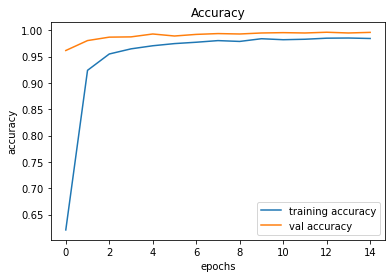

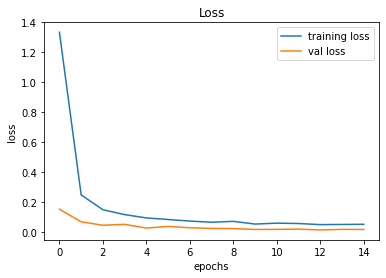

In [26]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
#imgs = testDf['Path'].values
#labels = testDf['ClassId'].values

In [28]:
data_test = []
labels_test = testDf["ClassId"].values
imgs= testDf["Path"].values
#Retrieving the images and their labels 

    #Converting lists into numpy arrays
path = os.path.join('E:\\Computer Vision\\', 'Traffic_sign_Recognition\\Test')
images_test = os.listdir(path)
print(path)
print(images_test)

for a in imgs:
    try:
        image_test = Image.open(a)
        image_test = image_test.resize((30,30))
        image_test = np.array(image_test)
        data_test.append(image_test)
        #labels_test.append(i)  
    except:
        print("Error loading image")

X_test = np.array(data_test)
X_test= X_test / 255
pred = model.predict(X_test)
classes_pred= np.argmax(pred,axis=1)

E:\Computer Vision\Traffic_sign_Recognition\Test
['00000.png', '00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png', '00020.png', '00021.png', '00022.png', '00023.png', '00024.png', '00025.png', '00026.png', '00027.png', '00028.png', '00029.png', '00030.png', '00031.png', '00032.png', '00033.png', '00034.png', '00035.png', '00036.png', '00037.png', '00038.png', '00039.png', '00040.png', '00041.png', '00042.png', '00043.png', '00044.png', '00045.png', '00046.png', '00047.png', '00048.png', '00049.png', '00050.png', '00051.png', '00052.png', '00053.png', '00054.png', '00055.png', '00056.png', '00057.png', '00058.png', '00059.png', '00060.png', '00061.png', '00062.png', '00063.png', '00064.png', '00065.png', '00066.png', '00067.png', '00068.png', '00069.png', '00070.png', '00071.png', '00072.png', '

395/395 [==============================] - 11s 17ms/step


In [36]:
classes_pred

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(labels_test,classes_pred)
print(classification_report(labels_test,classes_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.95      1.00      0.97       720
           2       0.96      1.00      0.98       750
           3       0.98      0.98      0.98       450
           4       0.98      0.99      0.99       660
           5       0.99      0.94      0.96       630
           6       1.00      0.91      0.95       150
           7       0.98      0.99      0.99       450
           8       0.98      0.97      0.98       450
           9       0.95      1.00      0.97       480
          10       0.98      0.99      0.99       660
          11       0.93      0.96      0.95       420
          12       1.00      0.96      0.98       690
          13       0.99      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.90      1.00      0.95       210
          16       0.99      0.99      0.99       150
          17       0.99    

## Prediction on test data

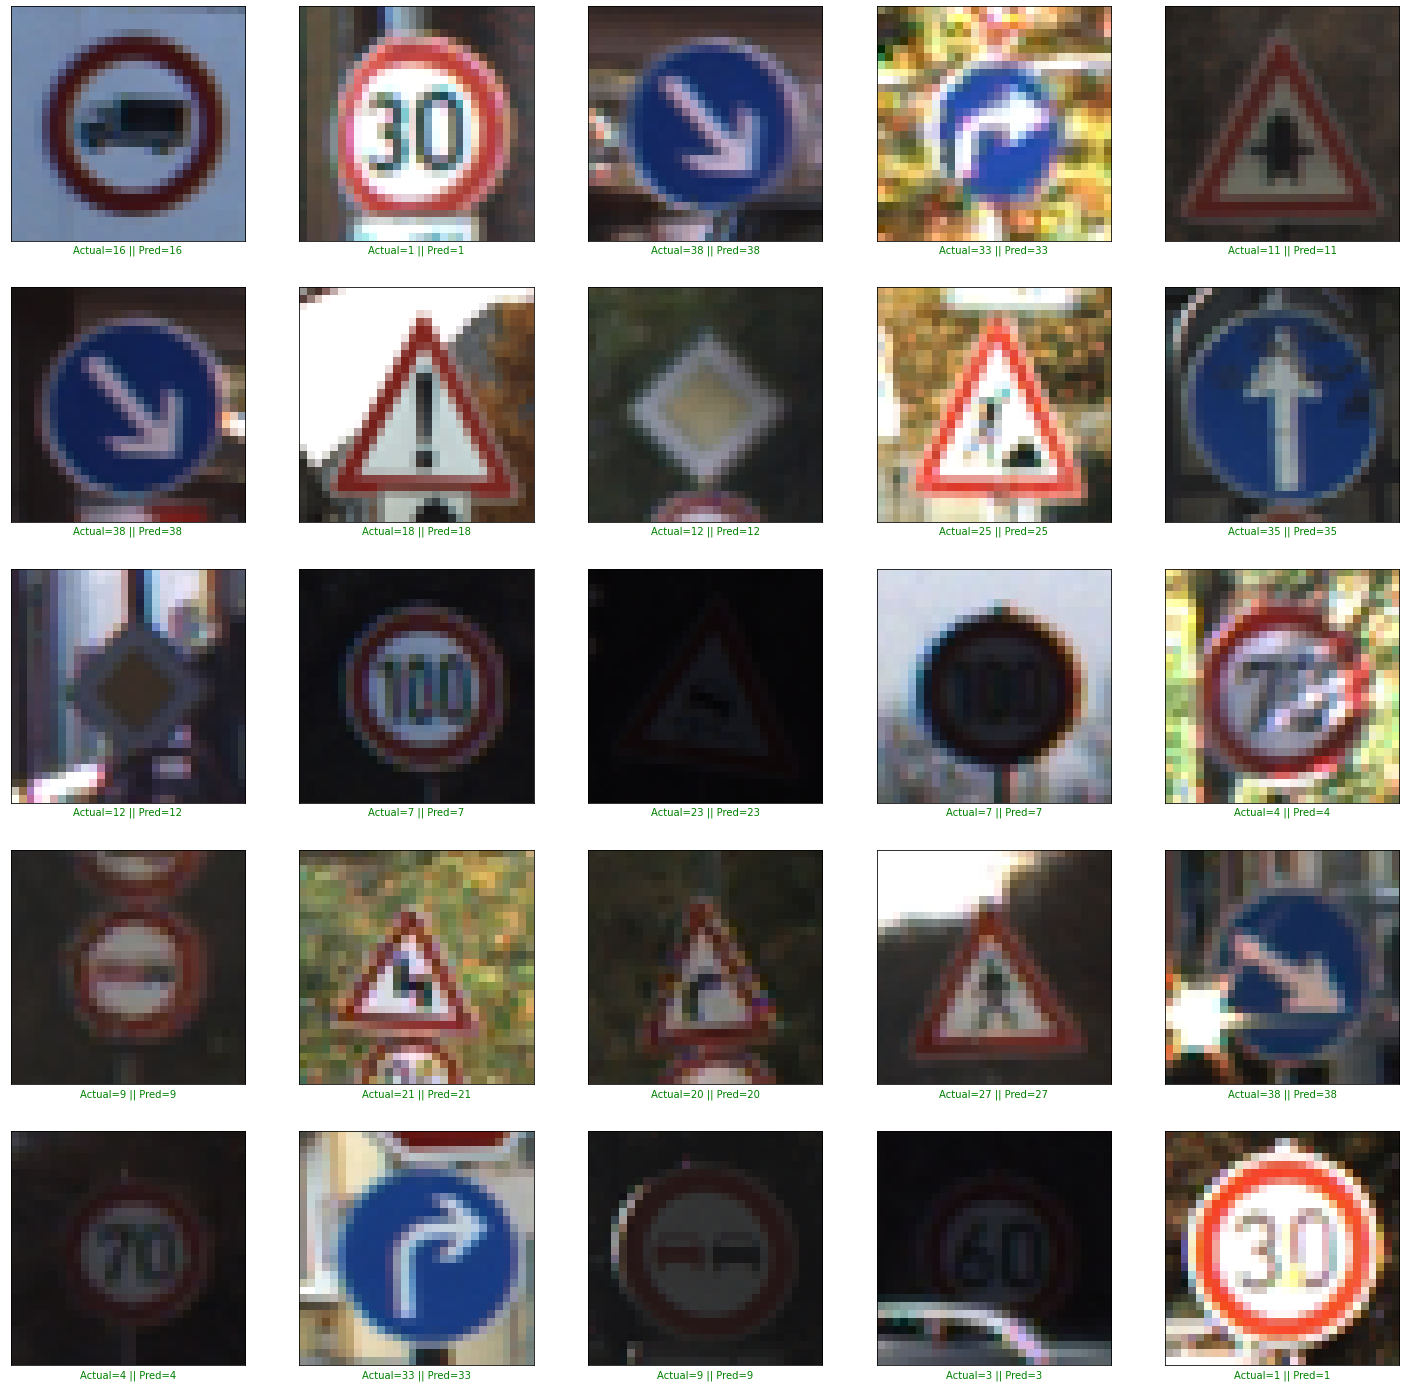

In [31]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = classes_pred[start_index + i]
    actual = labels_test[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()


In [39]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels_test,classes_pred)
cf

array([[ 60,   0,   0, ...,   0,   0,   0],
       [  0, 717,   0, ...,   0,   0,   0],
       [  0,   1, 749, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  86,   0,   0],
       [  0,   0,   0, ...,   0,  38,   0],
       [  0,   0,   0, ...,   0,   0,  87]], dtype=int64)

<AxesSubplot:>

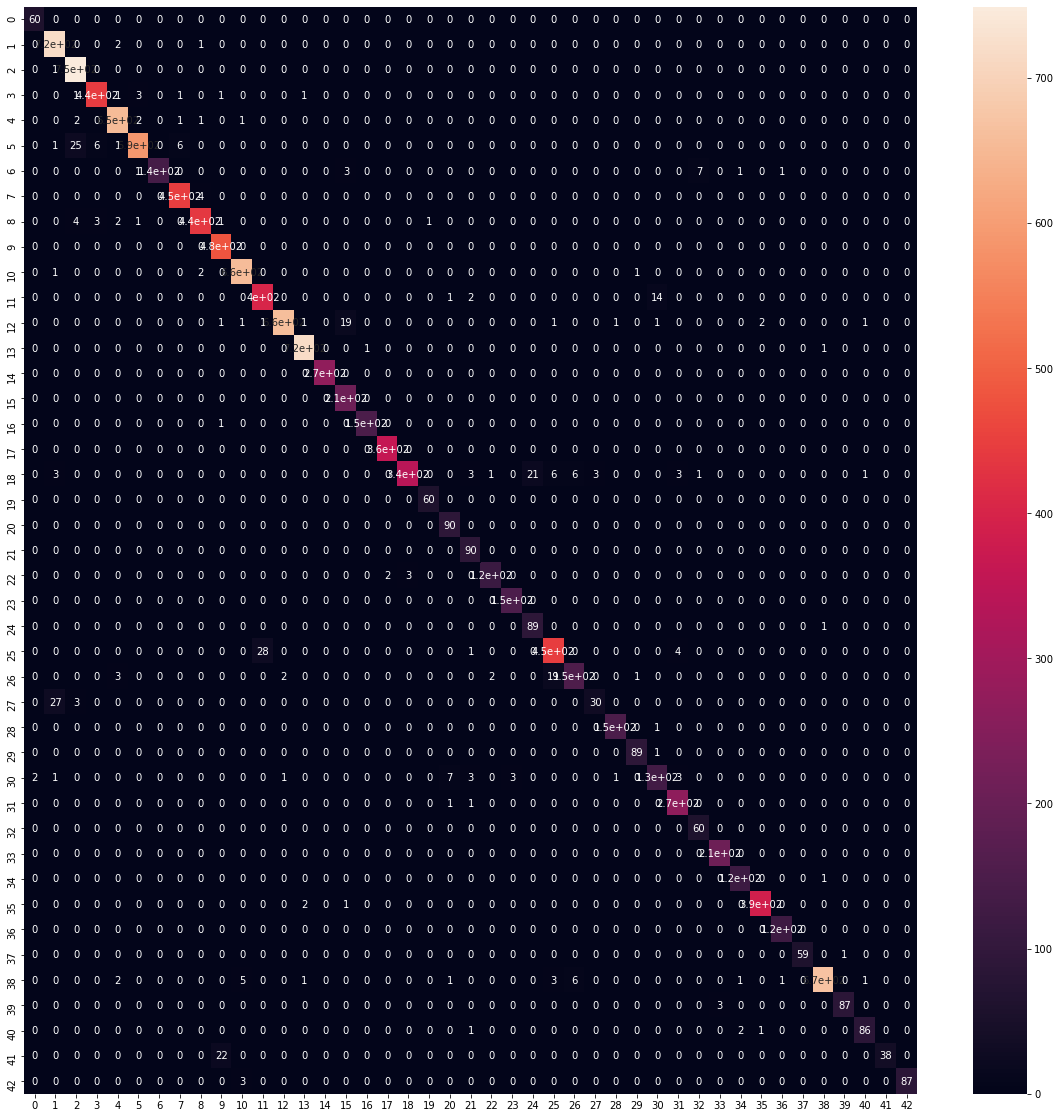

In [50]:
import seaborn as sns
df_cm = pd.DataFrame(cf)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)